### Задача о Ханойской башне

&#8195;&#8195; "Ханойская башня" является одной из популярных головоломок XIX века. Даны три стержня, на один из которых нанизаны восемь колец, причем кольца отличаются размером и лежат меньшее на большем. Задача состоит в том, чтобы перенести пирамиду из восьми колец за наименьшее число ходов на другой стержень. За один раз разрешается переносить только одно кольцо, причём нельзя класть большее кольцо на меньшее.

### Правила игры

&#8195;&#8195; Есть 1 стержень с дисками разного размера, и еще 2 пустых стержня. Надо переместить диски с одного стержня на другой. Перекладывать можно только по одному диску за ход. Складывать диски можно только меньший на больший.

### Алгоритм

&#8195;&#8195; При этом задача решается следующим образом:

- Переместить n-1 дисков со стержня 1 на стержень 2, используя стержень 3, как временное размещение.
- Переместить последний наибольший диск со стержня 1 на стержень 3.
- Переместить n-1 дисков со стержня 2 на стержень 3, используя стержень 1, как временное размещение.
- Процесс заканчивается, как только остается один стержень, то есть n=1. Последний диск просто перекладывается без временного размещения.

### Практическая реалиазция

&#8195;&#8195; Ниже вы сможете ввести количество дисков на стартовой башне, и увидеть поэтапное выполнение алгоритма. Чем светлее цвет квадрата на графике, тем меньше диск.

In [1]:
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import HTML

%matplotlib inline

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите на кнопку чтобы увидеть код"></form>''')

Введите количество дисков на стартовой башне
3


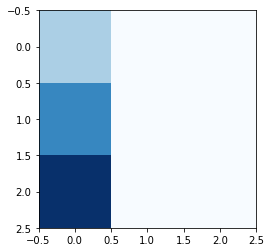

<Figure size 100x400 with 0 Axes>

Диск A к C


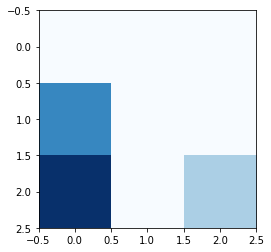

<Figure size 100x400 with 0 Axes>

Диск A к B


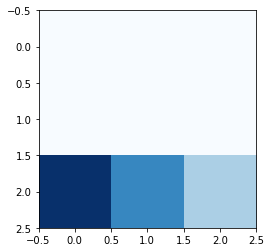

<Figure size 100x400 with 0 Axes>

Диск C к B


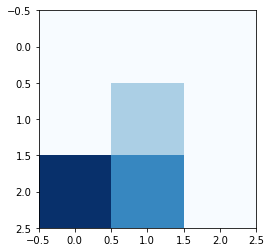

<Figure size 100x400 with 0 Axes>

Диск A к C


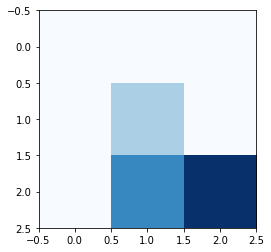

<Figure size 100x400 with 0 Axes>

Диск B к A


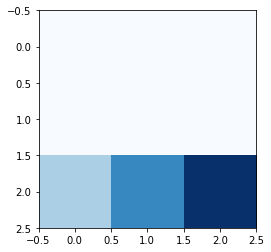

<Figure size 100x400 with 0 Axes>

Диск B к C


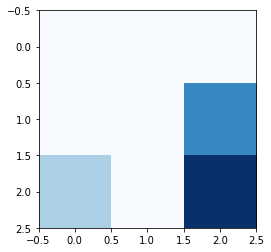

<Figure size 100x400 with 0 Axes>

Диск A к C


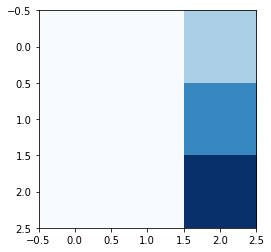

<Figure size 100x400 with 0 Axes>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def move(r,start, end, pivote,matrix,donut):
    if r >= 1:
        move(r-1,start,pivote,end,matrix,donut)
        move_donut(matrix,start,end,donut)
        move(r-1,pivote,end,start,matrix,donut)

def move_donut(matrix, start ,end,donut):
    
    print("Диск",start,"к",end)
    
    a=next((i for i, x in enumerate(matrix[:,0]) if x!=0), donut) 
    b=next((i for i, x in enumerate(matrix[:,1]) if x!=0), donut)
    c=next((i for i, x in enumerate(matrix[:,2]) if x!=0), donut)
    
    if start=="A":
        if end=="B":
            matrix[b-1,1]=matrix[a,0]
        else:
            matrix[c-1,2]=matrix[a,0]
        matrix[a,0]=0
    if start=="B":
        if end=="A":
            matrix[a-1,0]=matrix[b,1]
        else:
            matrix[c-1,2]=matrix[b,1]
        matrix[b,1]=0
    if start=="C":
        if end=="A":
            matrix[a-1,0]=matrix[c,2]
        else:
            matrix[b-1,1]=matrix[c,2]
        matrix[c,2]=0
        
    plt.imshow(matrix, cmap=plt.cm.Blues)
    plt.figure(num=None, figsize=(1, 4), dpi=100, facecolor='r', edgecolor='k')
    plt.show()

def tower_game(donut):
    
    matrix=np.zeros((donut,3))
    matrix[:donut,0]=range(1,donut+1)
    plt.imshow(matrix, cmap=plt.cm.Blues)
    plt.figure(num=None, figsize=(1, 4), dpi=100, facecolor='r', edgecolor='k')
    plt.show()
    move(r=donut,start="A",end="C",pivote="B", matrix=matrix,donut=donut)

def main():
    print("Введите количество дисков на стартовой башне")
    n = int(input())
    tower_game(n)
if __name__ == "__main__": 
    main()


#### В результате работы программы все диски с крайней левой башни были перемещены на крайную правую башню, что и требовалось сделать по условиям задачи.